<a href="https://colab.research.google.com/github/j-river1/TFM/blob/master/Download_Filters_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal
This notebook is for all process of images.

This workflow is based on (Despotovic,2014 [1])

# Read data

In [ ]:
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import os
import time
import sys
import pickle
import random
import numpy as np
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K

start_time = time.time()
def read_images(numalea = 2, path ='/content/drive/My Drive/Colab Notebooks/TFM/Datos/IXI-T1/*'):
   '''
    Inputs: - path: It is a path where is stored images
            - numberselect : it is a selection aleatory guys. 100 images from 581
    Output: - images: A list with information all images 
    '''
   ff = glob.glob(path)
   #aleatory numbers
   aleatorynumbers = []
   imagenes = []

   for x in range(numalea):
     aleatorynumbers.append(random.randint(0,580))   
   
   i = 0
   while i < len(aleatorynumbers):
     epi_img = nib.load(ff[aleatorynumbers[i]])
     epi_img_data = epi_img.get_fdata()
     max = epi_img_data.shape[2]- 1
     epi_img_data = epi_img_data [:,:,0:max]
     for j in range(epi_img_data.shape[2]-1):
       imagenes.append(epi_img_data[ :, :,j])
     i +=1
   return imagenes

print("--- %s seconds ---" % (time.time() - start_time))


--- 0.00024175643920898438 seconds ---


# Plot images

In [ ]:
def show_slices(slices, hight, width, aspects_title = None, multiple = 1):

    """ Function to display row of image slices 
        - aspects_title: Other things have title 
        - multiple: 1 
    """

    if multiple == 1:
      fig, axes = plt.subplots(hight,width,figsize=(15, 15))
      axes = axes.ravel()
      for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        if aspects_title is not None:
         axes[i].set_title(str(i) + "_" + str(aspects_title[i]))
        if aspects_title is None:
         axes[i].set_title(str(i))

    if multiple == 0:
      fig, axes = plt.subplots(hight,width,figsize=(7, 7))
      axes.imshow(slices.transpose(), cmap="gray", origin="lower")





# DownSampling


In [ ]:
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import os
import time
import sys
import pickle
import random
import numpy as np
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
import pandas as pd
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import statistics


start_time = time.time()
def size_images(numalea = 2, path ='/content/drive/My Drive/Colab Notebooks/TFM/Datos/IXI-T1/*', format = 1, parameter = 4 ):
   '''
    Inputs: - path: It is a path where is stored images
            - numberselect : it is a selection aleatory guys. 100 images from 581
            - format: 1 = Rescale, 
                      2 = Resize
                      3 = Downscale
            - parameter = a factor downscale


    Output: - images: A list with information all images 
    '''
   ff = glob.glob(path)
   imagenes = []
   aleatorynumbers = random.sample(range(580), numalea)
   
   i = 0
   while i < len(aleatorynumbers):
     epi_img = nib.load(ff[aleatorynumbers[i]])
     epi_img_data = epi_img.get_fdata()
     max = epi_img_data.shape[2]- 1
     epi_img_data = epi_img_data [:,:,0:max]
     for j in range(epi_img_data.shape[2]-1):
       image_perfomed = epi_img_data[ :, :,j]
       if format == 1:
        image_perfomed = downscale_local_mean(epi_img_data[ :, :,j], (parameter, parameter))
        imagenes.append(image_perfomed)
       if format == 2:
        image_perfomed =   resize(epi_img_data[ :, :,j], (epi_img_data[ :, :,j].shape[0]//parameter, epi_img_data[ :, :,j].shape[1]//parameter), anti_aliasing=True)
        imagenes.append(image_perfomed)
       if format == 3:
        parameter_aux = 1/parameter
        image_perfomed = rescale(epi_img_data[ :, :,j], parameter_aux, anti_aliasing=False)  
        imagenes.append(image_perfomed)      
     i +=1
   return imagenes


print("--- %s seconds ---" % (time.time() - start_time))

--- 0.00034046173095703125 seconds ---


# Histogram


In [ ]:
def plot_histogram(slices, hight, width, bins = [0,100,200,300,400,500, 600, 700, 800, 900,1000]):

    """ Function to display row of image slices 
        - aspects_title: Other things have title 
    """
    fig, axes = plt.subplots(hight,width,figsize=(50, 50) )
    axes = axes.ravel()
    for i, slice in enumerate(slices):
        axes[i].hist(images[i], bins = bins)


# Filter 

The filter is based on establish to lower bound for mean in the pixels per image. The lower bound is equal to 376.088 that is mean - 2 times deviation standard.

-**mean** = 265.90

-**deviation standar** = 321

-*****


In [ ]:
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import os
import time
import sys
import pickle
import random
import numpy as np
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
import pandas as pd
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import statistics
from numpy import save
      







start_time = time.time()
def filter_images(numalea_in = 0, numalea_fin = 2, path ='/content/drive/My Drive/Colab Notebooks/TFM/Datos/IXI-T1/*', format = 1, parameter = 4, savepath =  '/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados/'):
#def filter_images(numalea = 2, path ='/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados/*', format = 1, parameter = 4, savepath =  '/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados/'):

   '''
    Inputs: - path: It is a path where is stored images
            - numberselect : it is a selection aleatory guys. 100 images from 581
            - format: 1 = Rescale, 
                      2 = Resize
                      3 = Downscale
            - parameter = a factor downscale


    Output: - images: A list with information all images 
    '''
   ff = glob.glob(path)
   aleatorynumbers = []
   imagenes = []
   affinelist = []
   #fig, axes = plt.subplots(figsize=(7, 7))
   labels  = []
   indixes = []
  

   #aleatorynumbers = random.sample(range(580), numalea)
   #aleatorynumbers = range(numalea)

   i = 0
   p = 0
   #while i < len(aleatorynumbers):
   for i in range(numalea_in, numalea_fin):
    #print(aleatorynumbers[i])
     #print(i)
     #epi_img = nib.load(ff[aleatorynumbers[i]])
     epi_img = nib.load(ff[i])    
     epi_img_data = epi_img.get_fdata()
     affine = epi_img.affine
     max = epi_img_data.shape[2]- 1
     epi_img_data_aux = epi_img_data [:,:,0:max]
     for j in range(epi_img_data_aux.shape[2]-1):       
       image_perfomed = np.array(epi_img_data[ :, :,j])
       if format == 1:
        image_perfomed = downscale_local_mean(epi_img_data[ :, :,j], (parameter, parameter))
        counts, bins = np.histogram(image_perfomed, bins = [0,100,200,300,400,500, 600, 700, 800, 900,1000])
        sum100_200 = (counts[0] + counts[1])/sum(counts)
        sum100_200= round(sum100_200, 3)
        if sum100_200 < 0.90:
          saveimage = image_perfomed
          #p = p + 1
          #m = np.max(image_perfomed)
          #mi = np.min(image_perfomed)
          #imagesa = (image_perfomed - mi) / (m - mi)
          #fig, axes = plt.subplots(figsize=(7, 7)) 
          #axes.imshow(saveimage.transpose(), cmap="gray", origin="lower")
          #plt.savefig('/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocess/' + 'id_'+ str(p) + '.jpg')
          #plt.close()
          #save('/content/drive/My Drive/Colab Notebooks/TFM/Datos/Npy/'+ 'id_'+ str(p) + '.npy', saveimage)
          save('/content/drive/My Drive/npy64_5/'+ 'id_'+ str(p) + '.npy', saveimage)
          
          #labels.append(i)
          #indixes.append(j)
          p = p + 1
          print(p)
          #image_perfomed = None
          #imagenes.append(image_perfomed)
       if format == 2:
        image_perfomed =   resize(epi_img_data[ :, :,j], (epi_img_data[ :, :,j].shape[0]//parameter, epi_img_data[ :, :,j].shape[1]//parameter), anti_aliasing=True)
        counts, bins = np.histogram(image_perfomed, bins = [0,100,200,300,400,500, 600, 700, 800, 900,1000])
        sum100_200 = (counts[0] + counts[1])/sum(counts)
        sum100_200= round(sum100_200, 3)
        if sum100_200 < 0.9:
         imagenes.append(image_perfomed)
       if format == 3:
        parameter_aux = 1/parameter
        image_perfomed = rescale(epi_img_data[ :, :,j], parameter_aux, anti_aliasing=False)  
        counts, bins = np.histogram(image_perfomed, bins = [0,100,200,300,400,500, 600, 700, 800, 900,1000])
        sum100_200 = (counts[0] + counts[1])/sum(counts)
        sum100_200= round(sum100_200, 3)
        if sum100_200 < 0.90:
         imagenes.append(image_perfomed)
     #i +=1

   return imagenes, labels, indixes
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0004277229309082031 seconds ---


In [ ]:
def standardization (images, type):
   ''' 
    Input  - images = A matrix would be a input for network.
           - type =  1. Normalization
                     2. Standardization
    Output - intercual = A list with interquartile range

  '''
   if (type == 1 ):
    m = np.max(images)
    mi = np.min(images)
    images = (images - mi) / (m - mi)
   if (type == 2 ):
    mean  = np.mean(images)
    desvaition = np.std(images)
   return images
    

### Normalization and standardization

In this section, we use two types modify images: normalization and standardization

In [ ]:
def standardization (images, type):
   ''' 
    Input  - images = A matrix would be a input for network.
           - type =  1. Normalization
                     2. Standardization
    Output - intercual = A list with interquartile range

  '''
   if (type == 1 ):
    m = np.max(images)
    mi = np.min(images)
    images = (images - mi) / (m - mi)
   if (type == 2 ):
    mean  = np.mean(images)
    desvaition = np.std(images)
   return images
    

# Main

In [ ]:
start_time = time.time()
imagenes, labels, indixes = filter_images(numalea_in = 0, numalea_fin =50 , format = 1, parameter= 4)
#len(imagesw)
#newdf = df[(df.Height == 256) & (df.Width == 256)]
#df
print("--- %s seconds ---" % (time.time() - start_time))

39063
39064
39065
39066
39067
39068
39069
39070
39071
39072
39073
39074
39075
39076
39077
39078
39079
39080
39081
39082
39083
39084
39085
39086
39087
39088
39089
39090
39091
39092
39093
39094
39095
39096
39097
39098
39099
39100
39101
39102
39103
39104
39105
39106
39107
39108
39109
39110
39111
39112
39113
39114
39115
39116
39117
39118
39119
39120
39121
39122
39123
39124
39125
39126
39127
39128
39129
39130
39131
39132
39133
39134
39135
39136
39137
39138
39139
39140
39141
39142
39143
39144
39145
39146
39147
39148
39149
39150
39151
39152
39153
39154
39155
39156
39157
39158
39159
39160
39161
39162
39163
39164
39165
39166
39167
39168
39169
39170
39171
39172
39173


KeyboardInterrupt: ignored

In [ ]:

import os

path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/TFM/Datos/Npy"))
file_count = len(files)

In [ ]:
#imagenes[0]
start_time = time.time()
for i in range(len(imagenes)):
  #print(i)
  show_slices(imagenes[i], 1, 1, multiple =0 )
  plt.savefig('/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocess/' + 'id_'+ str(i) + '.jpg')
  plt.close()
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
file_count

66452

In [ ]:
imagenes[1].shape
#m = np.max(imagenes[1])
#m
#type(imagenes[1])
images_filter = standardization(imagenes, 1)
len(imagenes)

In [ ]:
from sklearn.model_selection import train_test_split

# #read images
# random.seed(30)
# images = read_images()

# #filter
# images_filter = []
# for j in range(len(images)):
#   if np.count_nonzero(images[j]) > 35000:
#     images_filter.append(images[j])

# #format
# images_filter = np.asarray(images_filter)
# images_filter = images_filter.reshape(-1, 256,256,1)
# images_filter.shape

#standarization
type(imagenes[1])
# images_filter = standardization(imagenes[1], 1)

#pad images
# temp = np.zeros([images_filter.shape[0],128,128,1])
# temp[:,3:,3:,:] = images_filter
# images_filter = temp

# # training and testing sets
# train_X,valid_X,train_ground,valid_ground = train_test_split(images_filter,
#                                                              images_filter,
#                                                              test_size=0.2,
#                                                              random_state=13)
imagenes


NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

# #read images
# random.seed(30)
# images = read_images()

# #filter
# images_filter = []
# for j in range(len(images)):
#   if np.count_nonzero(images[j]) > 35000:
#     images_filter.append(images[j])

# #format
# images_filter = np.asarray(images_filter)
# images_filter = images_filter.reshape(-1, 256,256,1)
# images_filter.shape

#standarization
type(imagenes[1])
# images_filter = standardization(imagenes[1], 1)

#pad images
# temp = np.zeros([images_filter.shape[0],128,128,1])
# temp[:,3:,3:,:] = images_filter
# images_filter = temp

# # training and testing sets
# train_X,valid_X,train_ground,valid_ground = train_test_split(images_filter,
#                                                              images_filter,
#                                                              test_size=0.2,
#                                                              random_state=13)



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-100-e747dabd3413>", line 1, in <module>
    from sklearn.model_selection import train_test_split
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 951, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 894, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1157, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1126, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1090, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", lin

OSError: ignored

In [ ]:
import tarfile

tar = tarfile.open("TarName.tar.gz", "w:gz")
tar.add("/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados/")
tar.close()

In [ ]:
#labels
indixes

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
random.sample(range(10), 10)

[9, 8, 0, 5, 3, 1, 4, 2, 6, 7]

In [ ]:
import tarfile
import os.path

def make_tarfile(output_filename, source_dir):
    with tarfile.open(output_filename, "w:gz") as tar:
        tar.add(source_dir, arcname=os.path.basename(source_dir))

In [ ]:
import tarfile
tar = tarfile.open("/content/drive/My Drive/Colab Notebooks/TFM/Datos/Ejemplo.tar.gz", "w:gz")
#for name in ["file1", "file2", "file3"]:
for name in glob.glob("/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados/*.nii"):
  #tar.add(name)
  tar.add(os.path.basename(name))
  #print(os.path.basename(name))
  #tar.add(name)
  #print(name)
tar.close()

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados

/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados


In [ ]:
make_tarfile("Ejemplo.gz", '/content/drive/My Drive/Colab Notebooks/TFM/Datos/Preprocesados/')

In [ ]:
len(affinelist) 
affinelist[0] == affinelist[1] 

print(affinelist[0] )
print(affinelist[1] )

[[ 3.73427197e-02 -1.82156190e-02  1.19882202e+00 -9.24877319e+01]
 [-9.28493738e-01  1.23496816e-01  5.04605360e-02  1.06192513e+02]
 [ 1.24141447e-01  9.29151773e-01  1.67955011e-02 -1.31474625e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 2.55945940e-02  1.64938122e-02  1.19936383e+00 -9.25905228e+01]
 [-9.21765029e-01 -1.68709680e-01  3.60294059e-02  1.36235977e+02]
 [-1.69115618e-01  9.22047198e-01 -1.48621155e-02 -8.99760361e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [ ]:
len(images)





66452

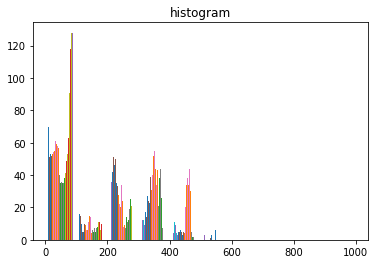

In [ ]:
a = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
#plt.hist(a, bins = [0,20,40,60,80,100]) 
#np.histogram(images[1])

from matplotlib import pyplot as plt 
import numpy as np  
plt.hist(images[60], bins = [0,100,200,300,400,500, 600, 700, 800, 900,1000]) 
plt.title("histogram") 
plt.show()

#type(images[1])

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np  
plt.hist(images[60]) 
plt.title("histogram") 
plt.show()

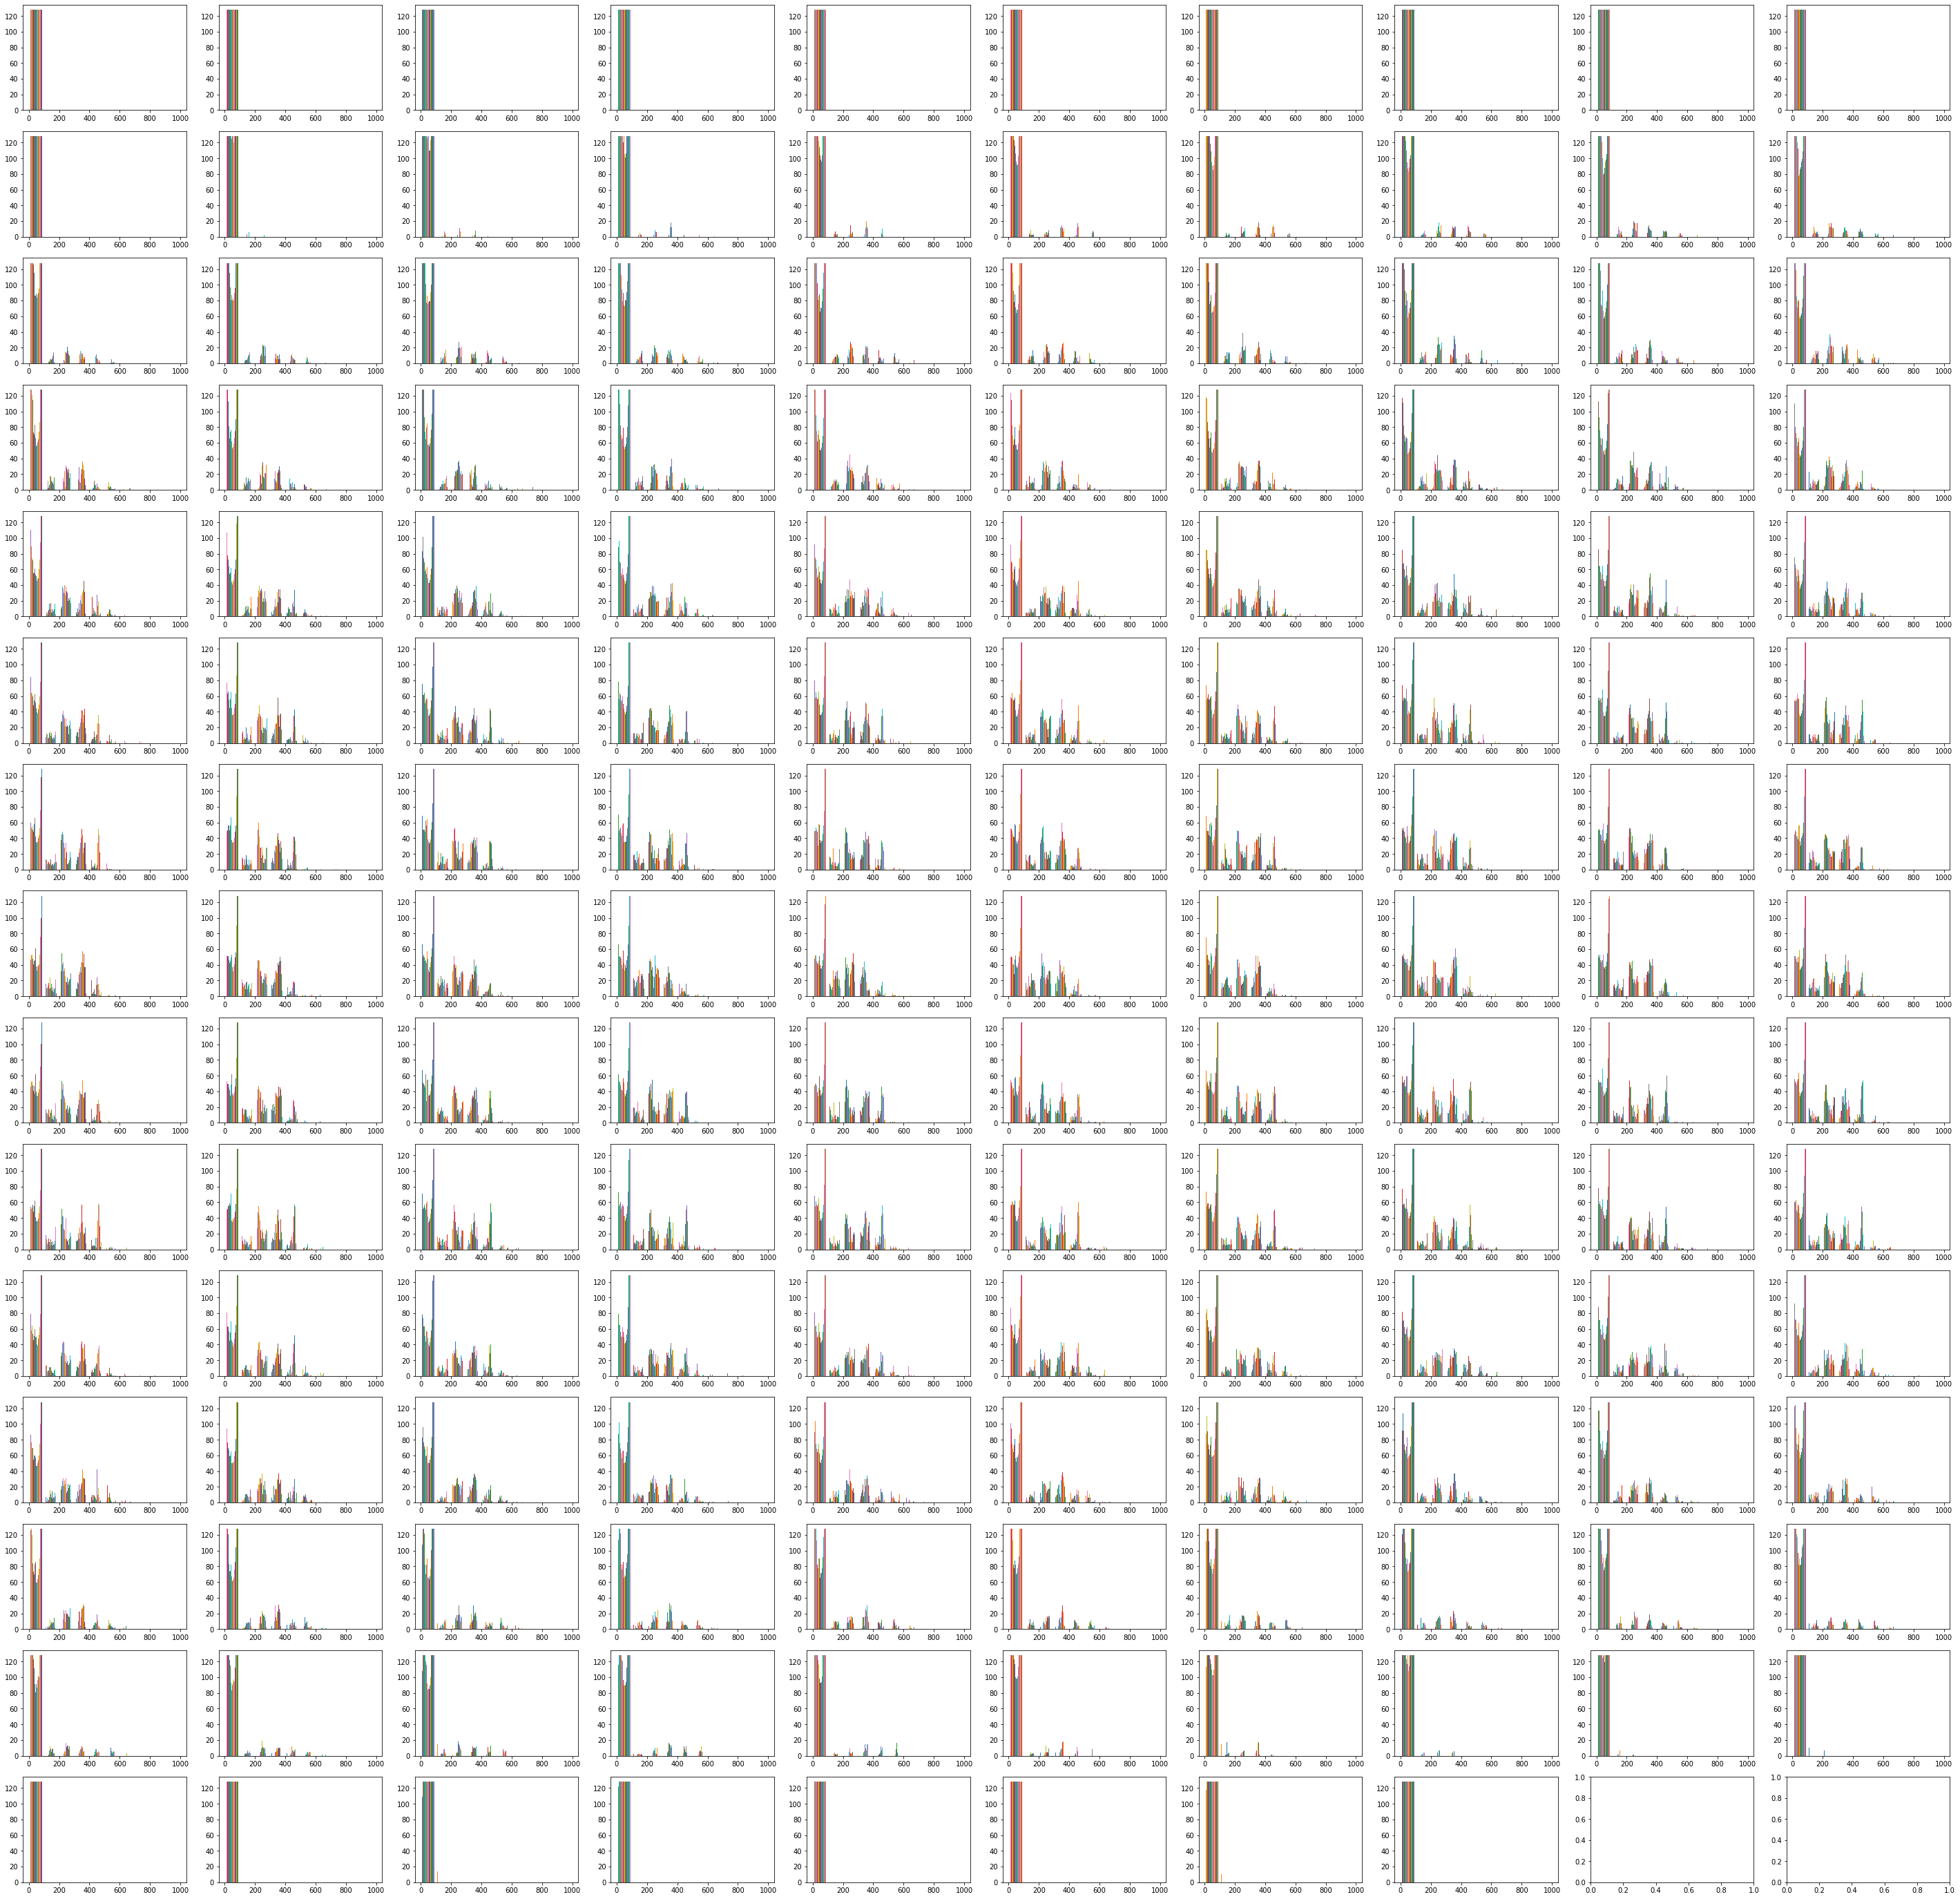

In [ ]:
plot_histogram(images, 15, 10)

In [ ]:
#print(type(images[0]))
#len(images)
show_slices(images[0], 1, 1)

#for slice in enumerate (images):
#  print(type(slice[1].T))
#  print(slice[1])
#  print(len(slice))






# path ='/content/drive/My Drive/Colab Notebooks/TFM/Datos/IXI-T1/*'
# ff = glob.glob(path)


# epi_img = nib.load(ff[1])
# epi_img_data = epi_img.get_fdata()
# epi_img_data.shape

# slice_0 = epi_img_data[26, :, :]
# slice_1 = epi_img_data[:, 30, :]
# slice_2 = epi_img_data[:, :, 16]

# slices= [slice_0, slice_1, slice_2]
# print(type(slices))
# fig, axes = plt.subplots(1, len(slices))
# for i, slice in enumerate(slices):
#  print(i)
#  print(type(slice.T)) 
 #axes[i].imshow(slice.T, cmap="gray", origin="lower")

# for i in range(len(lista)):
#  axes[i].imshow(slice.T, cmap="gray", origin="lower")
#   print(type(lista[i] ))

#slice_0 


NameError: ignored

In [ ]:
array_data = np.arange(24, dtype=np.int16).reshape((2, 3, 4))
affine = np.diag([1, 2, 3, 1])
array_img = nib.Nifti1Image(array_data, affine)

array_data
!pwd

/content


In [ ]:
import statistics
print(statistics.mean(mean)) 
print(statistics.mean(sd)) 
print(len(mean))

265.85561044429664
320.97224086291016
85484


In [ ]:
statistics.mean(mean) - 2*statistics.mean(sd)

-376.08887128152367

In [ ]:
len(mean)
type(mean)
statistics.mean(mean) 

0.13047975179425128

In [ ]:
type(df[1])

numpy.ndarray

In [ ]:
#df[1].mean()

np.std(df[1])

0.05161395521505127

In [ ]:
len(images)

144

In [ ]:
affine = np.diag([1, 2, 3, 1])
affine

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

# Plot Images

In [ ]:
import os
import numpy as np
import nibabel as nib
import glob
from matplotlib import pyplot as plt, patches
from pandas import DataFrame


def show_slices(slices, hight, width):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(hight,width,figsize=(50, 50) )
    axes = axes.ravel()
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].set_title(str(i))


# Outliers

This is for select images for study.

In [ ]:


def range_intercua(images):
  ''' 
    Input  - images = A list with value pixels as output read_images
    Output - intercual = A list with interquartile range
  '''

  amountNonzeros = []
  for i in range(len(images)):
    amountNonzeros.append(np.count_nonzero(images[i]))
  Q1 = np.percentile(amountNonzeros, 25)
  Q3 = np.percentile(amountNonzeros, 75)
  IQR = Q3 - Q1
  out = abs(Q1 - 1.5*IQR)

  return Q3, Q1, IQR, out


### Fix bounded limits 

In this section, we establish limits for amount zeros pixels.

In [ ]:
start_time = time.time()
limitsZero = []
for i in (range(len(df))):
 limitsZero.append(range_intercua(df)[3])

median = np.mean(limitsZero)
median
print("--- %s seconds ---" % (time.time() - start_time))

KeyboardInterrupt: ignored

The minimun value of non-zeros was 24365. If MRI images has less amount non zeros values this limit, therefore is not considered.

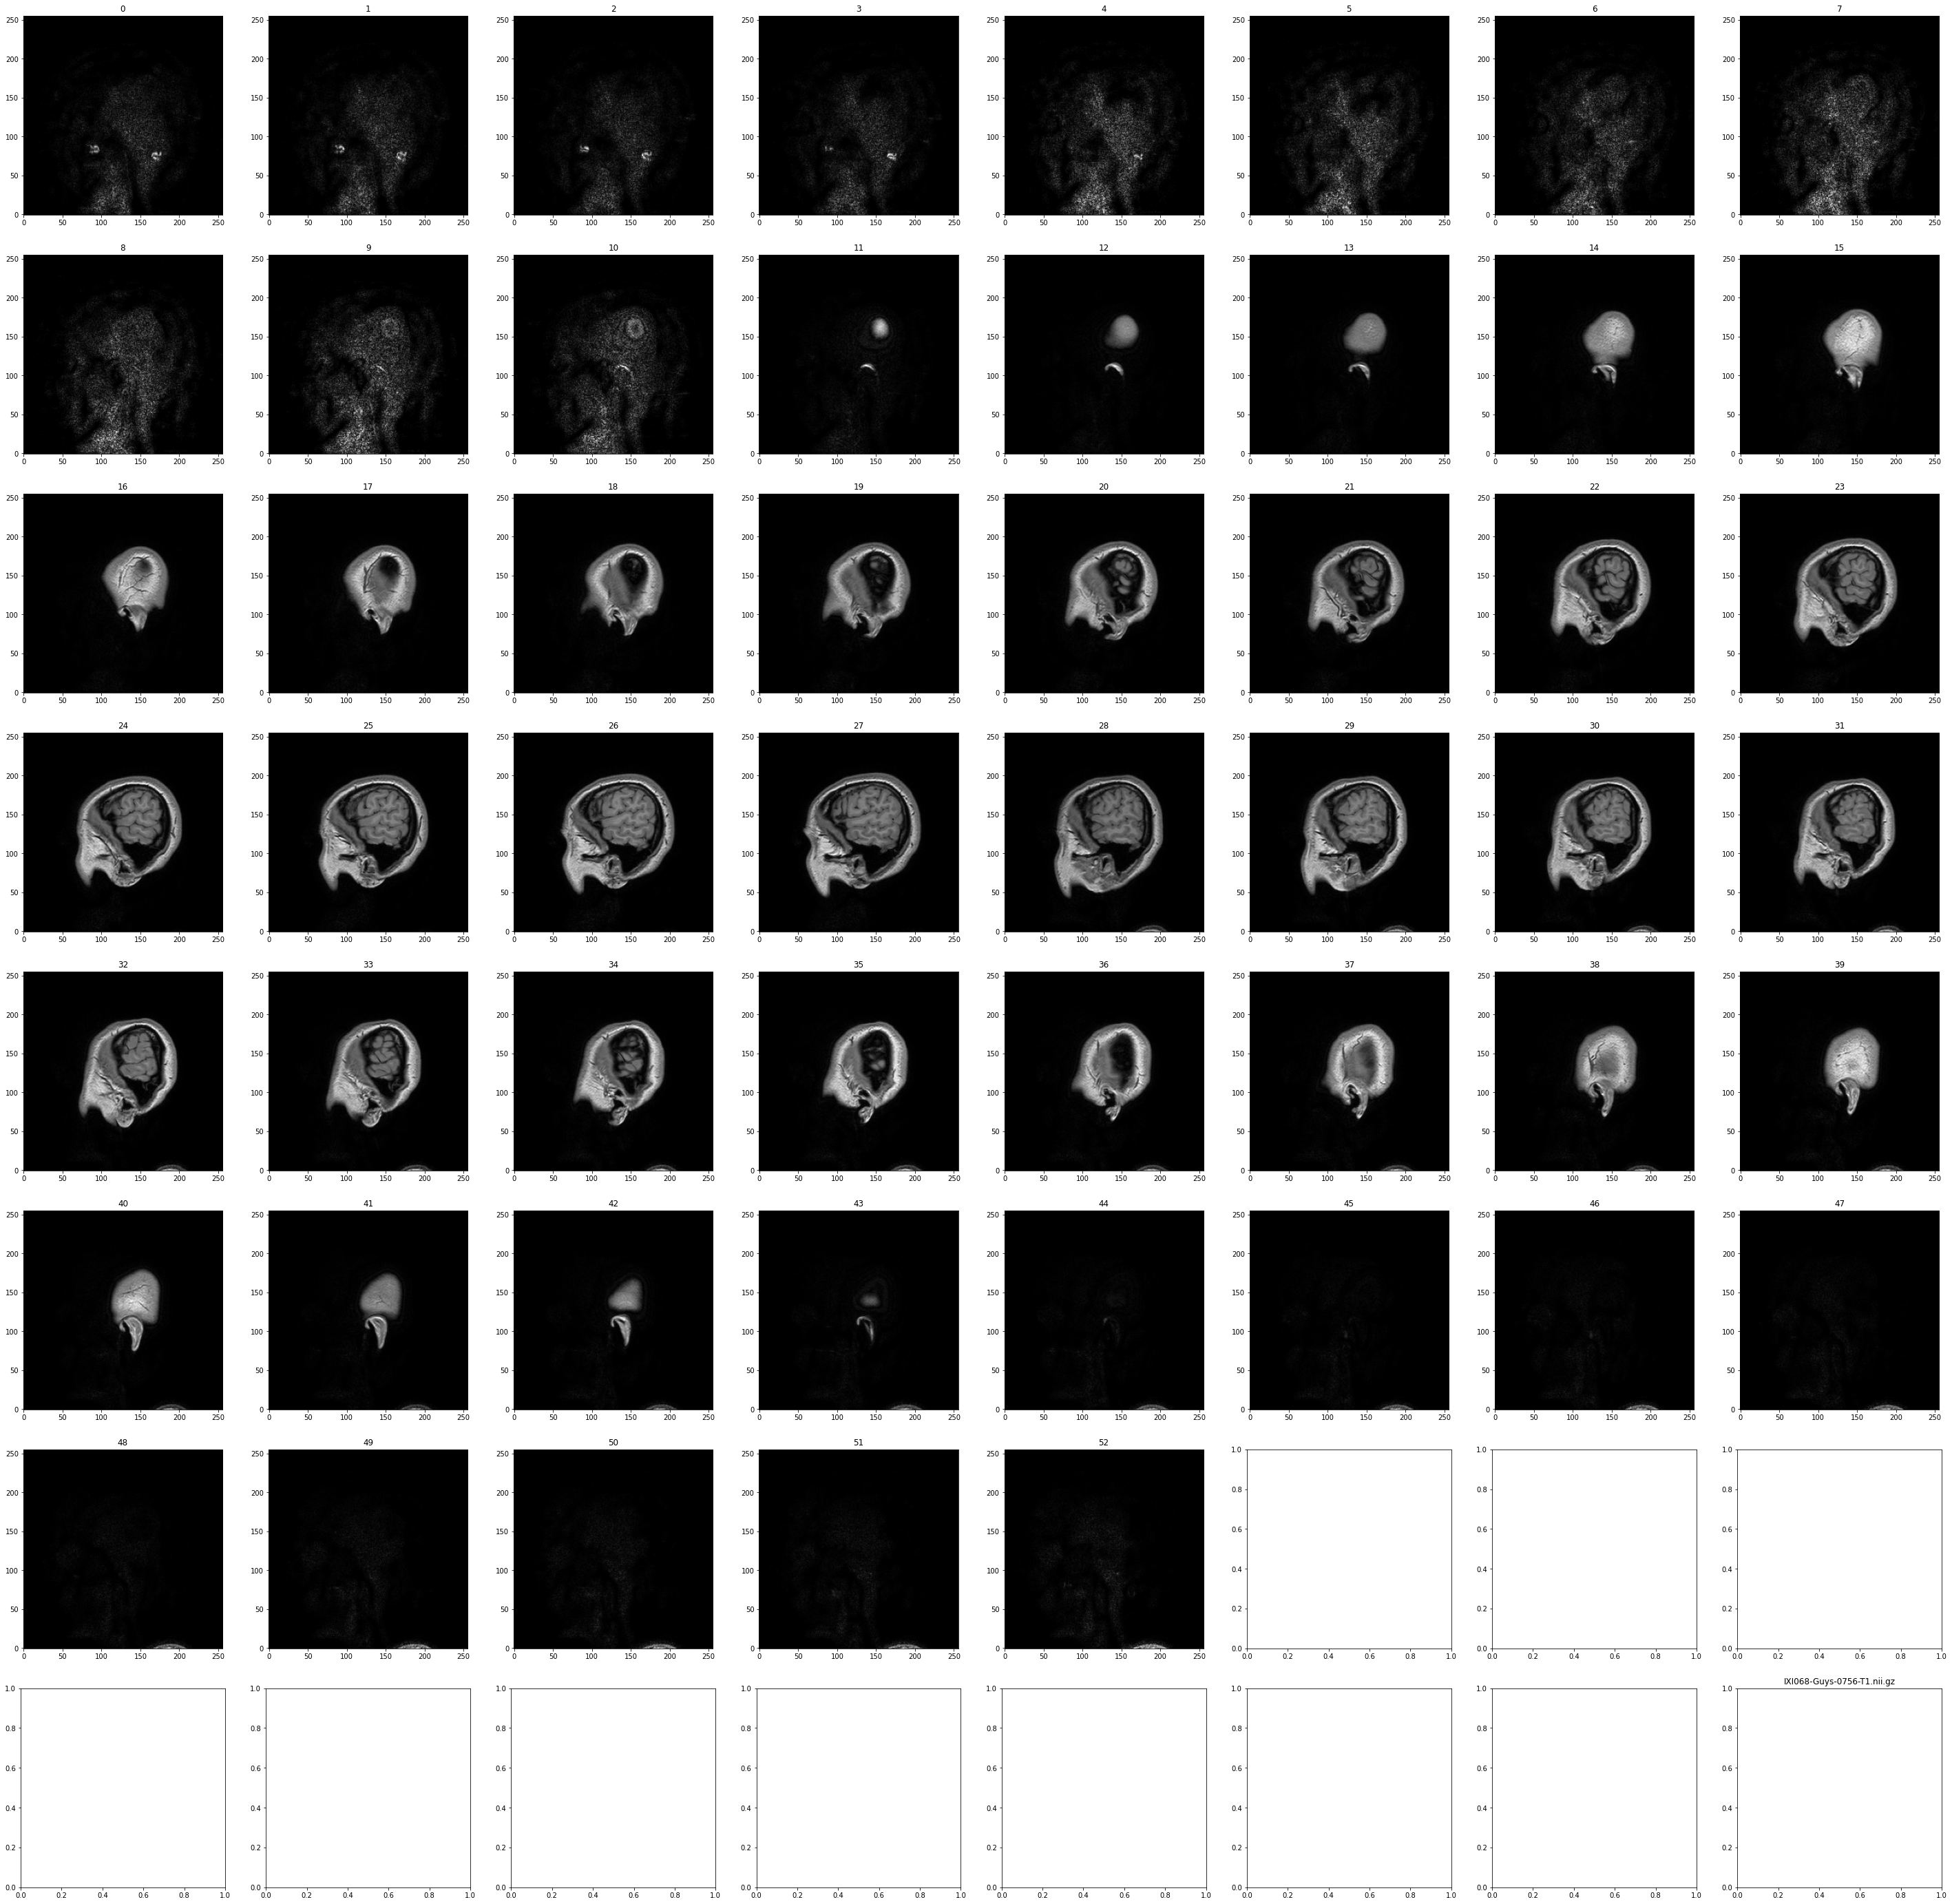

In [ ]:
import csv

ff = glob.glob('/content/drive/My Drive/Colab Notebooks/TFM/Datos/IXI-T1/*')
imagenes_filter = []
epi_img = nib.load(ff[0])
epi_img_data = epi_img.get_fdata()
max = epi_img_data.shape[2]- 1
epi_img_data = epi_img_data [:,:,0:max]
index = []
for j in range(epi_img_data.shape[2]-1):
  if np.count_nonzero(epi_img_data[ :, :,j]) < 35000:
    imagenes_filter.append(epi_img_data[ :, :,j])
    index.append(j)

with open(os.path.join('/content/drive/My Drive/Colab Notebooks/TFM/Datos/Outliers/',os.path.basename(ff[1]) +"_Outliers35000.csv"), 'w', newline = '') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(index)

show_slices(imagenes_filter, len(imagenes_filter)//6, 8) 
plt.title(os.path.basename(ff[1]))
plt.savefig(os.path.join('/content/drive/My Drive/Colab Notebooks/TFM/Datos/Outliers/',os.path.basename(ff[1]) + "_35000." + "jpg"))




### Main Code

Dataset (images) shape: (275, 259, 259, 1)


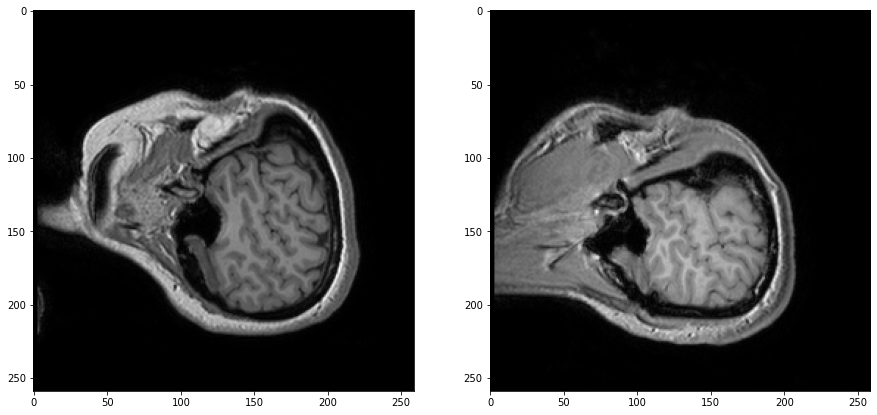

In [ ]:
# Shapes of training set
print("Dataset (images) shape: {shape}".format(shape=images_filter.shape))

plt.figure(figsize=[15,15])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(train_X[12], (259,259))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(valid_X[1], (259,259))
plt.imshow(curr_img, cmap='gray')


# The convolutional autoencoder 

In [ ]:
#Parameters

batch_size = 128
epochs = 300
inChannel = 1
x, y = 259, 259
input_img = Input(shape = (x,y, inChannel))



# Encoder
It has 3 Convolution blocks, each block has a convolution layer followed a batch normalization layer. Max-pooling layer is used after the first and second convolution blocks.

 

*   The first convolution block will have 32 filters of size 3 x 3, followed by a downsampling (max-pooling) layer.
*   The second block will have 64 filters of size 3 x 3, followed by another downsampling layer.
*   The final block of encoder will have 128 filters of size 3 x 3.






In [ ]:
def autoencoder(input_img):
#encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
 #decoder
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded


In this case, that's the mean squared error, since the loss after every batch will be computed between the batch of predicted output and the ground truth using mean squared error pixel by pixel:

In [ ]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [ ]:
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 259, 259, 1)]     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 259, 259, 32)      320       
_________________________________________________________________
batch_normalization_20 (Batc (None, 259, 259, 32)      128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 259, 259, 32)      9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 259, 259, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 129, 129, 32)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 129, 129, 64)     

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Epoch 1/300


ValueError: ignored

# Referencia

[1] MRI segmentation of the Human Brain: Challenges, Methods and Applications. (Ivana Despotovic, Bart Goosens)